# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

In [2]:
from skimage.io import imread,imsave,imshow
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

camera = imread("camera.jpg")
watermark = imread("watermark.png")

print(watermark.dtype, watermark.shape)
plt.figure()
plt.hist(watermark.flatten(),bins =100)
plt.show()

uint8 (85, 219)


Le watermark est une image binaire (encodée en 8-bits), ceci sera utile à exploiter plus tard.

In [3]:
from skimage.color import rgb2gray

def cumul_hist(hist):
    """Calcule l'histogramme cummul sur base d'un histogramme"""
    
    norm_hist = hist/hist.sum()
    histCumul = [0 for v in range (256)]  
    
    for i in range(len(norm_hist)): 
            histCumul[i] = histCumul[i-1]+norm_hist[i]
    
    return histCumul

In [4]:
def  black_or_white (im, coords, lim):
    """Détermine selon une image si un watermark devrait être plutôt
    sombre ou clair """
    
    if (len(im.shape)>2):
        ima = rgb2gray(im)
    else :
        ima = im.copy()
    
    #Zone où on veut mettre le watermark
    resized_im = ima[coords[0]:lim[0], coords[1]:lim[1]]
    
    #Calcul de l'histogramme cumulatif
    hist, bins = np.histogram(resized_im.flatten(), bins= 256)
    c_h = cumul_hist(hist)
    
    if(c_h[128]>0.5):
        #Image plutôt sombre
        return True 
    else :
        #Image plutôt claire
        return False


In [5]:
def add_wtm(im, wtm, coords, opa):
    """Ajoute un watermark en commençant par le coin surpérieur gauche du watermark
    (binaire) à partir des coordoonées d'un pixel de l'image"""
    
    wtm_sized = np.zeros((im.shape[0],im.shape[1]))
    
    #Défintion des limites de la place disponible pour le watermark
    ymax = min(wtm.shape[0]+coords[0],im.shape[0])
    xmax = min(wtm.shape[1]+coords[1],im.shape[1])
    
    #Adaptation du watermark à la taille de l'image
    for y in range (coords[0], ymax): 
        for x in range (coords[1], xmax):
            wtm_sized[y,x] = wtm[y-coords[0],x-coords[1]]

    im2 = im.copy()
    mask = (wtm_sized > 0)
    
    if (black_or_white (im, coords,(ymax,xmax))):
        #Zone du watemrak sombre, watermak clair
        im2[mask] = im[mask] + (255-im[mask])*opa
        
    else :
         #Zone du watemrak claire, watermak sommbre
        im2[mask] = im[mask]*(1-opa) 
        
    return im2

In [6]:
etretat = imread("etretat.jpg")
camera = imread("camera.jpg")
wtmed_f1 = add_wtm(etretat, watermark,(350,600), 0.8)
wtmed_f2 = add_wtm(etretat, watermark,(300,1000), 0.7)

wtmed_f3 = add_wtm(camera, watermark,(150,150), 0.8)
wtmed_f4 = add_wtm(camera, watermark,(0,0), 0.8)

#Sauvegarde de l'image avec son watermark
imsave("wtmed.jpg",wtmed_f1)

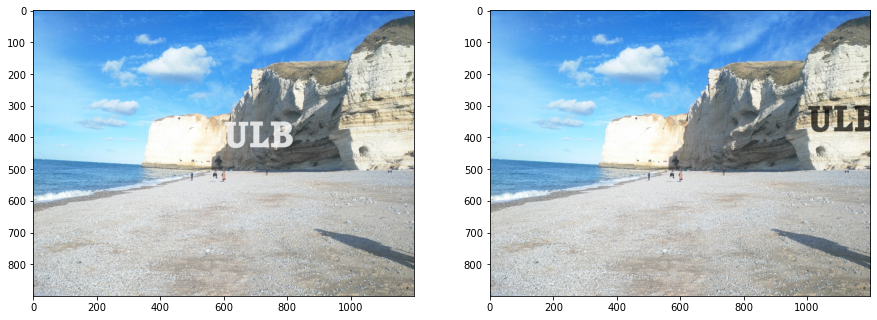

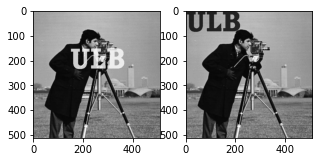

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(wtmed_f1)
plt.subplot(1,2,2)
plt.imshow(wtmed_f2)
plt.show()

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(wtmed_f3, cmap= cm.gray)
plt.subplot(1,2,2)
plt.imshow(wtmed_f4, cmap= cm.gray)
plt.show()